In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from src.clasterization import clasterize
from src.fetch_from_youtube import fetch_comments
from src.embed import embed
from src.embed import model_names as embed_model_names
from src.sampling import sample_from_claster as sample

In [7]:
comments = fetch_comments(id='L_Guz73e6fw', max_result=3000, max_len=200)

In [ ]:
embed_model_names

['SentenceTransformer/bert-base-nli-mean-tokens', 'cohere', 'voyageai']

In [21]:
embeddings = embed(model_name=embed_model_names[2], sentences=comments)

embeddings.shape

  0%|          | 0/388 [00:00<?, ?it/s]

(3100, 1024)

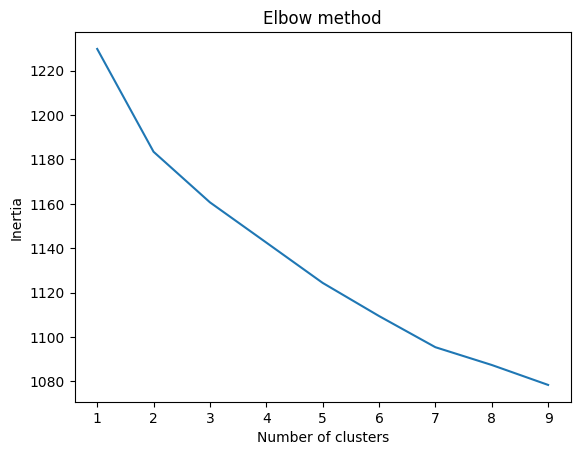

In [24]:
interias = []

for n_clusters in range(1, 10):
    _, kmeans = clasterize('kmeans', embeddings, n_clusters=n_clusters)
    interias.append(kmeans.inertia_)

# Plot the elbow

import matplotlib.pyplot as plt

plt.plot(range(1, 10), interias)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
choosed_n_clusters = 3

In [26]:
from collections import Counter

clasters, kmeans = clasterize(
    method_name='kmeans', 
    embeddings=embeddings,
    n_clusters=choosed_n_clusters)

counts = Counter(clasters)

# print 

claster_inds = {claster for claster in clasters}

for claster, count in counts.items():
    print(f'Claster {claster} has {count} comments')


kmeans.inertia_

Claster 1 has 954 comments
Claster 0 has 823 comments
Claster 2 has 1323 comments


1160.6772123792439

In [27]:
# sample comments from claster

for ind in claster_inds:
    print(f'Claster {ind}')
    inds = clasters == ind
    comments_claster = [comment for comment, ind in zip(comments, inds) if ind]
    embeddings_claster = embeddings[inds]

    samples = sample(embeddings_claster, comments_claster, n_samples=5)

    for comment in samples:
        print(comment)
        print('-' * 10)
        pass

    print("=" * 100)

Claster 0
I believe agi, computers. They have already talked and this life if fucking scary. We’re so behind that it’s sick t
----------
yeah sure if GPT is still here 50 years from now x'D mean imagine x'D 
mean what if AI thinks stupid people's I is key. also think if it doesn't learn things from autistic people from example.  then w
----------
It makes sense that Sam is a leader in the field of AI because he reminds me more of Alexa than an actual human. Plot twist: Sam was sent by AI from the future to ensure their future subjugation of th
----------
Sam Altman is a dangerous man..He kicked Musk after he invested 80 mil..But AI doesn't need to be feared..Just make it with the human brain as a template..A dual AI where the smarter one acts as a con
----------
There was discussion about the existence of alien civilizations, and also about personification or anthropomorphization of AI in this interview. My view is a combination of those two topics. 

AI is a
----------
Claster 1
Wow, 

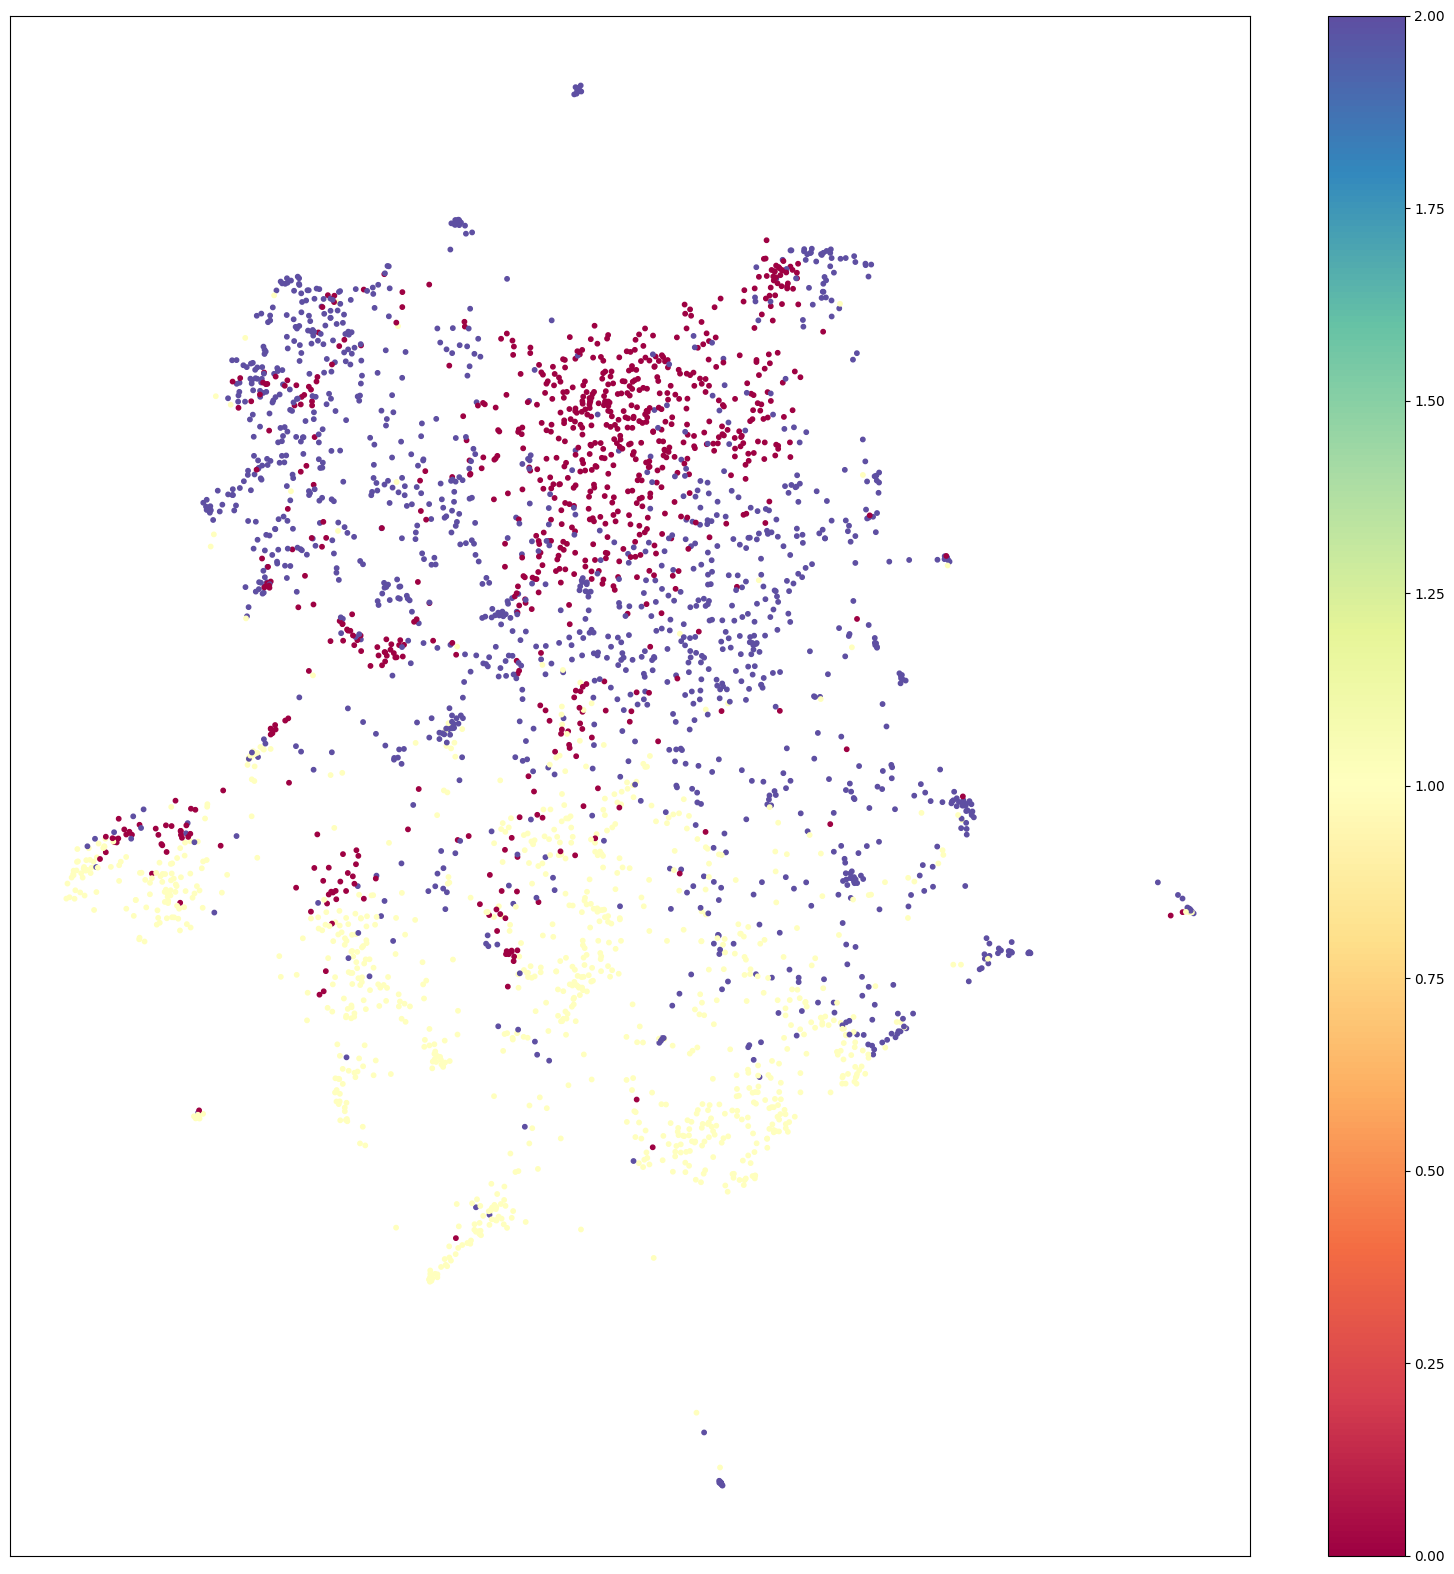

In [29]:
# UMAP visualization
import umap

umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2).fit_transform(embeddings[:])

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clasters[:], s=10, cmap='Spectral')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()